# MNIST Scratch

MNIST: Completely from scratch, only using NumPy.

# Dataset

In [13]:
import torch
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True)
train_image_zero, train_target_zero = trainset[0]

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:1], nrow=8).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


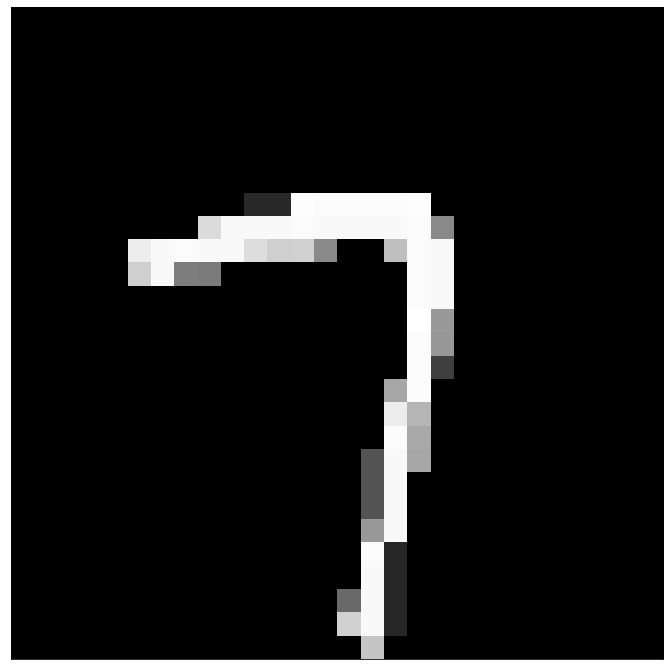

In [14]:
show_batch(trainloader)

# Model

In [71]:
import numpy as np

def softmax(x):
    e_x = torch.exp(x - torch.max(x)) # subtract max for numerical stability
    return e_x / e_x.sum(axis=-1, keepdims=True)

def relu(x):
    print("relu x.shape:", x.shape)
    return torch.maximum(torch.tensor([0]), x)

class Linear(object):
    def __init__(self, in_dim, out_dim):
        self.weight = torch.rand(in_dim, out_dim)
        self.bias   = torch.rand(out_dim)
    def __call__(self, x):
        return self.forward(x)
    def forward(self, x):
        return x @ self.weight + self.bias
    
class MLP(object):
    def __init__(self):
        self.fc1 = Linear(784, 512)
        self.fc2 = Linear(512, 10)
    def __call__(self, x):
        return self.forward(x)
    def forward(self, x):
        x = self.fc1(x)
        print("x = self.fc1(x):", x.shape)
        x = relu(x)
        print("x = relu(x):", x.shape)
        x = self.fc2(x)
        print("x = self.fc2(x):", x.shape)
        x = softmax(x)
        print("x = softmax(x):", x.shape)
        return x

# Single Forward Pass

In [73]:
from einops import rearrange

model = MLP()

for img, lbl in trainloader:
    
    img  = rearrange(img, "b c w h -> (b c) (w h)")
    img  = img.squeeze()
    print(img.shape)
    pred = model(img)
    break

print("pred:", pred)

torch.Size([784])
x = self.fc1(x): torch.Size([512])
relu x.shape: torch.Size([512])
x = relu(x): torch.Size([512])
x = self.fc2(x): torch.Size([10])
x = softmax(x): torch.Size([10])
pred: tensor([0.0727, 0.0960, 0.1007, 0.0962, 0.1441, 0.1108, 0.0792, 0.1032, 0.0872,
        0.1099])


# Backpropagation